In [ ]:
Nusers = 1000
Nmovies = 100

In [ ]:
import math
import numpy as np
import random
# S = np.random.randint(2, 6)   # Number of satellites (between 2 to 5)
# U = np.random.randint(5, 15)  # Number of UAVs (between 5 to 15)
# K = np.random.randint(2, 6)   # Number of CSPs (between 2 to 5)
# F = np.random.randint(10, 50) # Number of content files (10 to 50)
# N = np.random.randint(20, 100) # Number of GUs (20 to 100)
# # Maximum number of files UAV can store (F' << F)
# F_prime = np.random.randint(1, max(2, F // 2))  # At most 1/2 of total files
S = 2
U = 8
K = 2
N = Nusers
F = Nmovies
F_prime = (3*F)//16
M_u = 20
L = np.full(U, (2*F_prime)//3) # define transmissino load for each uav
# print(L)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load datasets
movies = pd.read_csv("/content/movies.dat", sep="::",nrows=Nmovies, names=['movieId', 'title', 'genres'], engine='python', encoding='ISO-8859-1')
ratings = pd.read_csv("/content/ratings.dat", sep="::", names=['userId', 'movieId', 'rating', 'timestamp'], engine='python')
users = pd.read_csv("/content/users.dat", sep="::",nrows=Nusers, names=['userId', 'gender', 'age', 'occupation', 'zip-code'], engine='python')

# Merge datasets
merged_data = pd.merge(ratings, users, on='userId', how='inner')
merged_data = pd.merge(merged_data, movies, on='movieId', how='inner')


In [ ]:
# Sorting by timestamp
merged_data = merged_data.sort_values(by='timestamp')

# Define number of timeslots
num_timeslots = 10

# Create timeslot labels
merged_data['timeslot'] = pd.qcut(merged_data['timestamp'], q=num_timeslots, labels=[int(f'{i+1}') for i in range(num_timeslots)])

# Display timeslot distribution
print(merged_data['timeslot'].value_counts())


merged_data


timeslot
9     515
1     514
2     514
3     514
5     514
4     514
8     514
7     514
6     513
10    513
Name: count, dtype: int64


,userId,movieId,rating,timestamp,gender,age,occupation,zip-code,title,genres,timeslot
5138,1000,1,5,975041651,F,25,6,90027,Toy Story (1995),Animation|Children's|Comedy,1
5117,999,6,2,975044156,M,25,15,62558,Heat (1995),Action|Crime|Thriller,1
5123,999,21,2,975044156,M,25,15,62558,Get Shorty (1995),Action|Comedy|Drama,1
5132,999,70,2,975045753,M,25,15,62558,From Dusk Till Dawn (1996),Action|Comedy|Crime|Horror|Thriller,1
5137,999,95,2,975045995,M,25,15,62558,Broken Arrow (1996),Action|Thriller,1
...,...,...,...,...,...,...,...,...,...,...,...
3792,736,1,3,1045710680,M,18,12,07070,Toy Story (1995),Animation|Children's|Comedy,10
3796,736,32,5,1045711057,M,18,12,07070,Twelve Monkeys (1995),Drama|Sci-Fi,10
3797,736,47,5,1045711096,M,18,12,07070,Seven (Se7en) (1995),Crime|Thriller,10
3793,736,6,4,1045711853,M,18,12,07070,Heat (1995),Action|Crime|Thriller,10


In [ ]:
merged_data.drop("title",axis=1,inplace=True)

In [ ]:
merged_data

,userId,movieId,rating,timestamp,gender,age,occupation,zip-code,genres,timeslot
5138,1000,1,5,975041651,F,25,6,90027,Animation|Children's|Comedy,1
5117,999,6,2,975044156,M,25,15,62558,Action|Crime|Thriller,1
5123,999,21,2,975044156,M,25,15,62558,Action|Comedy|Drama,1
5132,999,70,2,975045753,M,25,15,62558,Action|Comedy|Crime|Horror|Thriller,1
5137,999,95,2,975045995,M,25,15,62558,Action|Thriller,1
...,...,...,...,...,...,...,...,...,...,...
3792,736,1,3,1045710680,M,18,12,07070,Animation|Children's|Comedy,10
3796,736,32,5,1045711057,M,18,12,07070,Drama|Sci-Fi,10
3797,736,47,5,1045711096,M,18,12,07070,Crime|Thriller,10
3793,736,6,4,1045711853,M,18,12,07070,Action|Crime|Thriller,10


First find all unique genres list

In [ ]:
# Get unique genres from the dataset
unique_genres = set()

# Iterate through all genres and split them by '|'
for genre_list in merged_data['genres'].dropna():
    unique_genres.update(genre_list.split('|'))

# Convert set to a sorted list
unique_genres = sorted(unique_genres)

# Display unique genres
print(len(unique_genres)," : ",unique_genres)


16  :  ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War']


In [ ]:
for genre in unique_genres:
    merged_data[genre] = merged_data['genres'].apply(lambda x: 1 if genre in x.split('|') else 0)


merged_data.drop(columns=['genres'], inplace=True)


In [ ]:
merged_data

,userId,movieId,rating,timestamp,gender,age,occupation,zip-code,timeslot,Action,...,Documentary,Drama,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War
5138,1000,1,5,975041651,F,25,6,90027,1,0,...,0,0,0,0,0,0,0,0,0,0
5117,999,6,2,975044156,M,25,15,62558,1,1,...,0,0,0,0,0,0,0,0,1,0
5123,999,21,2,975044156,M,25,15,62558,1,1,...,0,1,0,0,0,0,0,0,0,0
5132,999,70,2,975045753,M,25,15,62558,1,1,...,0,0,0,1,0,0,0,0,1,0
5137,999,95,2,975045995,M,25,15,62558,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,736,1,3,1045710680,M,18,12,07070,10,0,...,0,0,0,0,0,0,0,0,0,0
3796,736,32,5,1045711057,M,18,12,07070,10,0,...,0,1,0,0,0,0,0,1,0,0
3797,736,47,5,1045711096,M,18,12,07070,10,0,...,0,0,0,0,0,0,0,0,1,0
3793,736,6,4,1045711853,M,18,12,07070,10,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
merged_data
merged_data['gender'] = merged_data['gender'].map({'M': 0,'F':1})

In [ ]:
merged_data.describe()
zip_mapping = {zip_code: idx for idx, zip_code in enumerate(merged_data["zip-code"].unique())}

# Apply mapping
merged_data['zip-code'] =merged_data['zip-code'].map(zip_mapping)

In [ ]:
df = merged_data[['userId', 'gender', 'age', 'occupation', 'zip-code',
       'movieId'] + unique_genres+ ['rating']]

In [ ]:
dataset_test = users.merge(movies, how='cross')
for genre in unique_genres:
    dataset_test[genre] = dataset_test['genres'].apply(lambda x: 1 if genre in x.split('|') else 0)


dataset_test.drop(columns=['genres'], inplace=True)
dataset_test.drop(columns=['title'], inplace=True)
dataset_test['gender'] = dataset_test['gender'].map({'M': 0,'F':1})

zip_mapping = {zip_code: idx for idx, zip_code in enumerate(dataset_test["zip-code"].unique())}

# Apply mapping
dataset_test['zip-code'] = dataset_test['zip-code'].map(zip_mapping)
print(dataset_test)
dataset_test = dataset_test.merge(df[['userId', 'movieId', 'rating']],
                                  on=['userId', 'movieId'],
                                  how='left')
dataset_test.fillna(0,inplace=True)


# Unique users and movies
unique_users = dataset_test["userId"].unique()      # = Nusers
unique_movies = dataset_test["movieId"].unique()        # = Nmovies

# Create mapping from original IDs to indices (starting from 1)
user_to_index = {user: idx + 1 for idx, user in enumerate(unique_users)}
movie_to_index = {movie: idx + 1 for idx, movie in enumerate(unique_movies)}

# Replace values in the DataFrame
dataset_test["userId"] = dataset_test["userId"].map(user_to_index)
dataset_test["movieId"] = dataset_test["movieId"].map(movie_to_index)



dataset_test.to_csv('dataset_test.csv')

       userId  gender  age  occupation  zip-code  movieId  Action  Adventure  \
0           1       1    1          10         0        1       0          0   
1           1       1    1          10         0        2       0          1   
2           1       1    1          10         0        3       0          0   
3           1       1    1          10         0        4       0          0   
4           1       1    1          10         0        5       0          0   
...       ...     ...  ...         ...       ...      ...     ...        ...   
99995    1000       1   25           6       269       97       0          0   
99996    1000       1   25           6       269       98       1          0   
99997    1000       1   25           6       269       99       0          0   
99998    1000       1   25           6       269      100       0          0   
99999    1000       1   25           6       269      101       0          0   

       Animation  Children's  ...  Docu

In [ ]:
dataset_test = pd.read_csv('dataset_test.csv')


In [ ]:
dataset_test

,Unnamed: 0,userId,gender,age,occupation,zip-code,movieId,Action,Adventure,Animation,...,Drama,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,rating
0,0,1,1,1,10,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,5.0
1,1,1,1,1,10,0,2,0,1,0,...,0,1,0,0,0,0,0,0,0,0.0
2,2,1,1,1,10,0,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0.0
3,3,1,1,1,10,0,4,0,0,0,...,1,0,0,0,0,0,0,0,0,0.0
4,4,1,1,1,10,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1000,1,25,6,269,96,0,0,0,...,1,0,0,0,0,0,0,0,0,0.0
99996,99996,1000,1,25,6,269,97,1,0,0,...,0,0,0,0,0,0,0,1,0,0.0
99997,99997,1000,1,25,6,269,98,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
99998,99998,1000,1,25,6,269,99,0,0,0,...,1,0,0,0,0,0,0,1,0,0.0


In [ ]:
dataset_test

,Unnamed: 0,userId,gender,age,occupation,zip-code,movieId,Action,Adventure,Animation,...,Drama,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,rating
0,0,1,1,1,10,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,5.0
1,1,1,1,1,10,0,2,0,1,0,...,0,1,0,0,0,0,0,0,0,0.0
2,2,1,1,1,10,0,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0.0
3,3,1,1,1,10,0,4,0,0,0,...,1,0,0,0,0,0,0,0,0,0.0
4,4,1,1,1,10,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1000,1,25,6,269,96,0,0,0,...,1,0,0,0,0,0,0,0,0,0.0
99996,99996,1000,1,25,6,269,97,1,0,0,...,0,0,0,0,0,0,0,1,0,0.0
99997,99997,1000,1,25,6,269,98,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
99998,99998,1000,1,25,6,269,99,0,0,0,...,1,0,0,0,0,0,0,1,0,0.0


In [ ]:
df

,userId,gender,age,occupation,zip-code,movieId,Action,Adventure,Animation,Children's,...,Drama,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,rating
5138,1000,1,25,6,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,5
5117,999,0,25,15,1,6,1,0,0,0,...,0,0,0,0,0,0,0,1,0,2
5123,999,0,25,15,1,21,1,0,0,0,...,1,0,0,0,0,0,0,0,0,2
5132,999,0,25,15,1,70,1,0,0,0,...,0,0,1,0,0,0,0,1,0,2
5137,999,0,25,15,1,95,1,0,0,0,...,0,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,736,0,18,12,183,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,3
3796,736,0,18,12,183,32,0,0,0,0,...,1,0,0,0,0,0,1,0,0,5
3797,736,0,18,12,183,47,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5
3793,736,0,18,12,183,6,1,0,0,0,...,0,0,0,0,0,0,0,1,0,4


In [ ]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['userId', 'gender', 'age', 'occupation', 'zip-code',
       'movieId',] + unique_genres]
y = df['rating']



X_train, y_train = X, y


In [ ]:
X_train

,userId,gender,age,occupation,zip-code,movieId,Action,Adventure,Animation,Children's,...,Documentary,Drama,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War
5138,1000,1,25,6,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5117,999,0,25,15,1,6,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5123,999,0,25,15,1,21,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5132,999,0,25,15,1,70,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5137,999,0,25,15,1,95,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,736,0,18,12,183,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3796,736,0,18,12,183,32,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3797,736,0,18,12,183,47,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3793,736,0,18,12,183,6,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
# Train data
X_train_raw = X
y_train = y

# Normalize
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
# X_test_scaled = scaler.transform(X_test_raw)

# Reshape for LSTM
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
# X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Define the model
model = Sequential()

# Layer 1: First LSTM layer with 24 units and return_sequences=True
model.add(LSTM(24, return_sequences=True, input_shape=(1, X_train_scaled.shape[1])))

# Layer 2: Second LSTM layer with 24 units
model.add(LSTM(24, return_sequences=True))

# Layer 3: Third LSTM layer with 12 units
model.add(LSTM(12))

# Output layer: Fully connected (Dense) layer with linear activation
model.add(Dense(1, activation='linear'))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mean_absolute_error')
model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


161/161 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 3.4392
Epoch 2/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0119
Epoch 3/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8790
Epoch 4/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8524
Epoch 5/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8529
Epoch 6/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8481
Epoch 7/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8417
Epoch 8/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8427
Epoch 9/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8285
Epoch 10/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8360
Epoch 11/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8356
Epoch 12/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.8329
Epoch 13/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.8297
Epoch 14/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8162
Epoch 15/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8262


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 24)          │         4,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 24)          │         4,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 12)             │         1,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,017 (128.98 KB)

 Trainable params: 11,005 (42.99 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,012 (85.99 KB)

In [ ]:
X_test = dataset_test[['userId', 'gender', 'age', 'occupation', 'zip-code',
       'movieId']+ unique_genres]
y_test = dataset_test['rating']

In [ ]:
X_test_scaled = scaler.transform(X_test)  # Use .transform, not .fit_transform
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
preds = model.predict(X_test_lstm)


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [ ]:
actual_q_i_f =  dataset_test.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)
actual_q_i_f


predicted_q_i_f = np.zeros((Nusers, Nmovies))


unique_users = dataset_test["userId"].unique()      # = Nusers
unique_movies = dataset_test["movieId"].unique()        # = Nmovies


test_user_ids = dataset_test["userId"].values
test_movie_ids = dataset_test["movieId"].values
print(len(pd.Series(test_user_ids).unique()))

user_to_index = {user: idx for idx, user in enumerate(unique_users)}
movie_to_index = {movie: idx for idx, movie in enumerate(unique_movies)}

# Fill the matrix
for i in range(len(preds)):
    user_idx = user_to_index[test_user_ids[i]]
    movie_idx = movie_to_index[test_movie_ids[i]]
    # print(user_idx,movie_idx)
    predicted_q_i_f[user_idx][movie_idx] = preds[i]
    # print(predicted_q_i_f[user_idx][movie_idx])

print("Matrix filled with predicted ratings.")
# Resulting 2D array: predicted_q_i_f
print(predicted_q_i_f.shape)


# if np.all(predicted_q_i_f == 0):
#     print("The matrix contains only zeros.")
# else:
#     print("The matrix has non-zero values.")

non_zero_count = np.count_nonzero(predicted_q_i_f)
total_elements = predicted_q_i_f.size

print(f"Non-zero elements: {non_zero_count}")
print(f"Total elements: {total_elements}")
print(f"Percentage of non-zero values: {(non_zero_count / total_elements) * 100:.4f}%")



1000
Matrix filled with predicted ratings.
(1000, 100)
Non-zero elements: 100000
Total elements: 100000
Percentage of non-zero values: 100.0000%


<ipython-input-26-8b172ab6d75e>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_q_i_f[user_idx][movie_idx] = preds[i]


In [ ]:
actual_q_i_f

movieId,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
predicted_q_i_f = pd.DataFrame(predicted_q_i_f)
predicted_q_i_f.index = range(1, predicted_q_i_f.shape[0] + 1)
predicted_q_i_f.columns = range(1, predicted_q_i_f.shape[1] + 1)
predicted_q_i_f.index.name = "userId"
predicted_q_i_f.columns.name = "movieId"
predicted_q_i_f

movieId,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
userId,,,,,,,,,,,,,,,,,,,,,
1,3.843413,2.458013,2.769242,3.719235,2.344362,3.795666,2.782391,3.103368,1.433123,2.978508,...,3.868882,2.981573,3.714859,2.323772,2.619754,3.716226,2.325228,3.158410,3.870406,2.630639
2,3.943866,2.726127,2.967848,3.873883,2.618828,3.908435,2.976156,3.340176,1.588544,3.230795,...,3.969541,3.084614,3.855157,2.510146,2.781003,3.855837,2.508185,3.376677,3.970402,2.786116
3,3.888628,2.402668,2.677477,3.787542,2.277194,3.844284,2.689278,3.130118,1.253246,3.025026,...,3.913232,2.856114,3.768465,2.234716,2.504060,3.769536,2.233812,3.175137,3.914441,2.511987
4,3.925958,2.528514,2.862996,3.845700,2.513169,3.891102,2.874854,3.234448,1.430537,3.172491,...,3.952521,3.039736,3.826468,2.469054,2.737402,3.827625,2.468524,3.326984,3.954040,2.744895
5,3.887376,2.452182,2.678705,3.785955,2.270463,3.840260,2.689146,3.151012,1.276347,3.017196,...,3.910794,2.835370,3.766999,2.209095,2.475790,3.767849,2.207685,3.162542,3.911619,2.482953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,4.071867,3.586543,3.619252,4.035727,3.463835,4.050522,3.621645,3.845495,2.913168,3.764613,...,4.078971,3.645634,4.031021,3.403131,3.495960,4.031119,3.400851,3.814075,4.079169,3.496202
997,4.050987,3.476170,3.509423,4.003172,3.317857,4.024848,3.512483,3.780750,2.699666,3.687138,...,4.055489,3.546308,3.997884,3.268212,3.364357,3.997977,3.265864,3.736763,4.055610,3.365174
998,4.054535,3.477628,3.516877,4.012746,3.327903,4.027035,3.519369,3.780983,2.668021,3.679922,...,4.061467,3.543458,4.004058,3.241823,3.369702,4.004138,3.239350,3.742943,4.061583,3.370382


In [ ]:
print("Actual\t|Predicted\t|Difference\t|")
for i in range(len(y_test)):  # Use len(y_test) instead of a fixed number
    print(y_test.iloc[i], "\t|", preds[i], "\t|", y_test.iloc[i] - preds[i], "\t|")


Streaming output truncated to the last 5000 lines.
5.0 	| [4.0862255] 	| [0.91377449] 	|
0.0 	| [3.6235995] 	| [-3.62359953] 	|
0.0 	| [3.7051187] 	| [-3.70511866] 	|
0.0 	| [4.056953] 	| [-4.05695295] 	|
0.0 	| [3.5934937] 	| [-3.5934937] 	|
0.0 	| [4.071237] 	| [-4.07123709] 	|
0.0 	| [3.7082293] 	| [-3.7082293] 	|
0.0 	| [3.8742132] 	| [-3.87421322] 	|
0.0 	| [3.0886984] 	| [-3.08869839] 	|
0.0 	| [3.8288064] 	| [-3.8288064] 	|
0.0 	| [4.081333] 	| [-4.08133316] 	|
0.0 	| [2.8706365] 	| [-2.87063646] 	|
0.0 	| [4.064889] 	| [-4.06488895] 	|
0.0 	| [4.037954] 	| [-4.03795385] 	|
0.0 	| [3.6305642] 	| [-3.63056421] 	|
0.0 	| [4.0863466] 	| [-4.08634663] 	|
0.0 	| [4.064073] 	| [-4.06407309] 	|
0.0 	| [3.787124] 	| [-3.78712392] 	|
0.0 	| [3.6054986] 	| [-3.60549855] 	|
0.0 	| [3.098459] 	| [-3.09845901] 	|
0.0 	| [4.007811] 	| [-4.00781107] 	|
0.0 	| [4.1682973] 	| [-4.16829729] 	|
0.0 	| [3.7893145] 	| [-3.78931451] 	|
0.0 	| [4.0841913] 	| [-4.08419132] 	|
0.0 	| [4.0656743] 	| [-4.

In [ ]:
print("Actual\t|Predicted\t|Difference\t|")
for i in range(len(y_test)):  # Use len(y_test) instead of a fixed number
    print(y_test.iloc[i], "\t|", preds[i].round(), "\t|", y_test.iloc[i] - preds[i].round(), "\t|")


Streaming output truncated to the last 5000 lines.
5.0 	| [4.] 	| [1.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [3.] 	| [-3.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [3.] 	| [-3.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [3.] 	| [-3.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	| [-4.] 	|
0.0 	| [4.] 	|

In [ ]:
print(mean_absolute_error(y_test,preds))
import numpy as np
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE:", rmse)


3.4877324825948475
RMSE: 3.578481965048879


Declaring Function to compute states and action

In [ ]:
import numpy as np

# Step 1: Clustering UAVs to Satellites (1-Based Indexing)
num_clusters = S
uav_indices = np.arange(1, U + 1)  # Start from 1 instead of 0
np.random.shuffle(uav_indices)  # Shuffle UAVs for random assignment
UAVs_per_cluster = np.array_split(uav_indices, num_clusters)

print("Clusters of UAVs:", [list(cluster) for cluster in UAVs_per_cluster])

# Step 2: Assign Ground Users to UAVs Randomly While Satisfying Capacity Constraints
GU_list = np.arange(1, N + 1)  # List of Ground Users (1-based indexing)
np.random.shuffle(GU_list)  # Shuffle GUs for random assignment

# Initialize User-UAV Association Matrix (U x N) (1-Based Indexing)
X_ui = np.zeros((U, N), dtype=int)

GU_assignment = {}  # Dictionary to store cluster-wise assignment
GU_counter = 0  # Start GU numbering from 1

# Assign users to UAVs randomly while ensuring max capacity constraint
for cluster_id, uav_list in enumerate(UAVs_per_cluster, start=1):  # Start cluster from 1
    GU_assignment[cluster_id] = {}
    for uav in uav_list:
        if GU_counter >= N:  # If all users are assigned, stop
            break

        # Determine how many users to assign (between 1 and M_u)
        num_GUs = min(np.random.randint(1, M_u + 1), N - GU_counter)

        # Assign GUs to UAV (1-Based Indexing)
        assigned_GUs = list(GU_list[GU_counter:GU_counter + num_GUs])
        GU_assignment[cluster_id][uav] = assigned_GUs

        # Update User-UAV association matrix (1-Based Indexing)
        for gu in assigned_GUs:
            X_ui[uav - 1, gu - 1] = 1  # Adjust for 0-based indexing in NumPy

        GU_counter += num_GUs

# Ensure all users are assigned (handling unassigned GUs)
all_assigned_GUs = sum(len(gus) for cluster in GU_assignment.values() for gus in cluster.values())
unassigned_GUs = N - all_assigned_GUs

if unassigned_GUs > 0:
    all_uavs = [uav for cluster in GU_assignment.values() for uav in cluster.keys()]
    np.random.shuffle(all_uavs)  # Shuffle UAVs for fair distribution
    for i in range(unassigned_GUs):
        selected_uav = all_uavs[i % len(all_uavs)]
        for cluster_id, uavs in GU_assignment.items():
            if selected_uav in uavs and len(uavs[selected_uav]) < M_u:
                GU_assignment[cluster_id][selected_uav].append(GU_list[GU_counter])
                X_ui[selected_uav - 1, GU_list[GU_counter] - 1] = 1  # Adjust for NumPy indexing
                GU_counter += 1
                break

# Print Results
print(f"Satellites (S): {S}, UAVs (U): {U}, Ground Users (N): {N}, Clusters: {num_clusters}, Max Users per UAV: {M_u}")

print("\nCluster Assignments:")
for cluster, uavs in GU_assignment.items():
    print(f"Cluster {cluster}:")
    for uav, gu_list in uavs.items():
        print(f"  UAV {uav}: {len(gu_list)} GUs -> {gu_list}")

print("\nUser-UAV Association Matrix (X_ui):")
print(X_ui)   # U x N


Clusters of UAVs: [[np.int64(1), np.int64(5), np.int64(3), np.int64(7)], [np.int64(2), np.int64(4), np.int64(8), np.int64(6)]]
Satellites (S): 2, UAVs (U): 8, Ground Users (N): 1000, Clusters: 2, Max Users per UAV: 20

Cluster Assignments:
Cluster 1:
  UAV 1: 20 GUs -> [np.int64(863), np.int64(180), np.int64(326), np.int64(261), np.int64(246), np.int64(465), np.int64(439), np.int64(314), np.int64(758), np.int64(511), np.int64(345), np.int64(203), np.int64(214), np.int64(871), np.int64(431), np.int64(739), np.int64(163), np.int64(556), np.int64(332), np.int64(305)]
  UAV 5: 20 GUs -> [np.int64(508), np.int64(550), np.int64(598), np.int64(417), np.int64(14), np.int64(312), np.int64(671), np.int64(494), np.int64(279), np.int64(107), np.int64(153), np.int64(543), np.int64(710), np.int64(388), np.int64(752), np.int64(983), np.int64(599), np.int64(119), np.int64(32), np.int64(255)]
  UAV 3: 20 GUs -> [np.int64(159), np.int64(582), np.int64(868), np.int64(656), np.int64(8), np.int64(731), np.

In [ ]:
X_ui.shape   # ( U, N)

(8, 1000)

In [ ]:

def content_popularity_prediction(N, F, u, X_ui, predicted_q_i_f):
    """
    Calculate total content popularity Q^f_u(t) for each content f for UAV 'u'.

    Parameters:
    - N (int): Total number of GUs
    - F (int): Number of content files
    - u (int): UAV ID for which popularity is calculated
    - X_ui (np.array): User-UAV Association Matrix (U x N)
    - predicted_q_i_f (np.array): Popularity matrix (N x F), each element q_i^f(t)

    Returns:
    - Q_f_u (np.array): Total popularity array for each content f for UAV 'u'
    """
    Q_f_u = np.zeros(F)  # Initialize total requests for UAV 'u'
    for f in range(F):
        temp = 0
        for i in range(N):  # Iterate over all users
            if X_ui[u-1][i] == 1:  # If user 'i' is associated with UAV 'u'
                temp += predicted_q_i_f[f+1][i+1]  # Add the user's requests
        Q_f_u[f] = temp

    return Q_f_u


# Compute content popularity for a specific UAV (e.g., UAV 1)
predicted_Q_f_u = content_popularity_prediction(N, F, 1, X_ui, predicted_q_i_f)

# Print Results
print(f"\nTotal Requests for UAV {1} (Q^f_u):")
print(predicted_Q_f_u)



Total Requests for UAV 1 (Q^f_u):
[79.82817316 61.43575883 65.08720517 78.54921222 59.75808764 79.24559402
 65.22554183 70.9439528  42.84577942 69.25696778 79.65103149 38.4535557
 78.99516177 77.7757082  61.76396775 79.81912708 78.93905187 67.42105675
 60.33688831 43.30064309 76.54636455 82.78783417 67.51447034 79.67558575
 79.003901   77.90480852 77.91482997 62.00145817 73.77745795 77.94422722
 77.95380878 79.71547532 70.48078465 79.84950638 79.07701826 78.00010896
 70.61355615 61.01169515 66.14663577 78.03525686 79.84540987 81.79314184
 78.06053662 59.91836596 78.845608   79.14776301 80.71174765 78.80810785
 79.16536641 80.72217059 78.47673202 61.43444967 78.13831639 67.40118384
 78.15270686 63.03435254 78.16671705 79.21397281 71.33785081 63.11547685
 80.0388658  78.20011044 61.72599554 66.66389298 61.77536774 73.37132454
 78.23121428 66.73219299 61.87086773 75.28744078 44.86020577 78.96734166
 78.77491355 79.28547239 78.97768235 73.40022421 71.10353947 78.29185581
 80.0953815  78.3

In [ ]:
predicted_Q_f_all_uav=[]
for u in range(0,U):
    predicted_Q_f_all_uav.append(content_popularity_prediction(N,F,u+1,X_ui,predicted_q_i_f))
print("array storing total requests count for all UAV set\n",predicted_Q_f_all_uav)



array storing total requests count for all UAV set
 [array([79.82817316, 61.43575883, 65.08720517, 78.54921222, 59.75808764,
       79.24559402, 65.22554183, 70.9439528 , 42.84577942, 69.25696778,
       79.65103149, 38.4535557 , 78.99516177, 77.7757082 , 61.76396775,
       79.81912708, 78.93905187, 67.42105675, 60.33688831, 43.30064309,
       76.54636455, 82.78783417, 67.51447034, 79.67558575, 79.003901  ,
       77.90480852, 77.91482997, 62.00145817, 73.77745795, 77.94422722,
       77.95380878, 79.71547532, 70.48078465, 79.84950638, 79.07701826,
       78.00010896, 70.61355615, 61.01169515, 66.14663577, 78.03525686,
       79.84540987, 81.79314184, 78.06053662, 59.91836596, 78.845608  ,
       79.14776301, 80.71174765, 78.80810785, 79.16536641, 80.72217059,
       78.47673202, 61.43444967, 78.13831639, 67.40118384, 78.15270686,
       63.03435254, 78.16671705, 79.21397281, 71.33785081, 63.11547685,
       80.0388658 , 78.20011044, 61.72599554, 66.66389298, 61.77536774,
       73.3

In [ ]:
def rank_function(predicted_Q_f, predicted_Q_list):
    """
    Calculate the rank of a specific content f based on its estimated popularity Q_f.

    Args:
        predicted_Q_f (float): Popularity of a specific content f for a UAV.
        predicted_Q_list (list of float): Popularities of all contents for the same UAV.

    Returns:
        int: Rank of the content (lower rank means higher popularity).
    """
    return sum(predicted_Q_f <= predicted_Q_f_prime for predicted_Q_f_prime in predicted_Q_list)


# Dictionary to store rankings for all uav
rank_all_uav = {}

# Compute ranks for each UAV
for uav_idx , popularity_uav_list in enumerate(predicted_Q_f_all_uav):
    temp_dict = {}
    for f_idx, popularity_val in enumerate(popularity_uav_list):
        rank = rank_function(popularity_val,popularity_uav_list)
        temp_dict[f_idx] = rank
    rank_all_uav[uav_idx] = temp_dict


# Print Rankings
print("\nRanks of each content for all UAVs one by one:")
for uav, content_ranks_dict in rank_all_uav.items():
    print(f"\nUAV {uav}:")
    for content, rank in content_ranks_dict.items():
        print(f"  Content {content}, Pop'Value {predicted_Q_f_all_uav[uav][content]} : Rank {rank}")


Ranks of each content for all UAVs one by one:

UAV 0:
  Content 0, Pop'Value 79.82817316055298 : Rank 13
  Content 1, Pop'Value 61.43575882911682 : Rank 88
  Content 2, Pop'Value 65.08720517158508 : Rank 77
  Content 3, Pop'Value 78.54921221733093 : Rank 34
  Content 4, Pop'Value 59.75808763504028 : Rank 93
  Content 5, Pop'Value 79.2455940246582 : Rank 20
  Content 6, Pop'Value 65.22554183006287 : Rank 76
  Content 7, Pop'Value 70.94395279884338 : Rank 64
  Content 8, Pop'Value 42.84577941894531 : Rank 99
  Content 9, Pop'Value 69.25696778297424 : Rank 67
  Content 10, Pop'Value 79.65103149414062 : Rank 17
  Content 11, Pop'Value 38.45355570316315 : Rank 100
  Content 12, Pop'Value 78.99516177177429 : Rank 27
  Content 13, Pop'Value 77.77570819854736 : Rank 55
  Content 14, Pop'Value 61.763967752456665 : Rank 86
  Content 15, Pop'Value 79.8191270828247 : Rank 14
  Content 16, Pop'Value 78.93905186653137 : Rank 30
  Content 17, Pop'Value 67.42105674743652 : Rank 70
  Content 18, Pop'

In [ ]:
def tilde_cache_placement_from_rank(F, F_prime,rank_all_uav):
    """
    Generate ideal cache placement vector Γ̃_u(t)  using content rank information with predicted popularity and ignoring transmission constraint

    Parameters:
    - F (int): Total number of content files.
    - F_prime (int): Cache storage limit (maximum number of files that can be cached).
    - predicted_rank_dict (dict): Dictionary where keys are content indices and values are ranks (integers) based on predicted content popularity.

    Returns:
    - Gamma_u (np.array): Binary cache placement vector (0 or 1).
    """
    # Initialize cache vector with zeros
    Gamma = np.zeros((U,F), dtype=int)
    # Iterate through rank dictionary and cache content with rank <= F'
    for uav, per_uav_rank_list in rank_all_uav.items():
        for f, rank in per_uav_rank_list.items():
            if rank <= F_prime:
                Gamma[uav][f] = 1  # Cache this content

    return Gamma

# Compute cache placement vector
Gamma_tilde = tilde_cache_placement_from_rank(F, F_prime, rank_all_uav)

print("tilde Cache placement vector Γ(t):", Gamma_tilde)



tilde Cache placement vector Γ(t): [[1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0
  0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0
  0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0
  0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0
  0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0
  0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0

In [ ]:
def generate_random_cache_placement(U, F, F_prime):
    """
    Generate a random cache placement matrix for time slot (t-1).

    Parameters:
    - U (int): Number of UAVs.
    - F (int): Total number of content files.
    - F_prime (int): Cache storage limit per UAV.

    Returns:
    - Gamma_prev (np.array): Random binary cache placement matrix (U x F).
    """
    Gamma_prev = np.zeros((U, F), dtype=int)

    for uav in range(U):
        cached_files = np.random.choice(F, F_prime, replace=False)  # Select F' unique files
        Gamma_prev[uav, cached_files] = 1  # Mark selected files as cached

    return Gamma_prev

Gamma_t_minus_1 = generate_random_cache_placement(U, F, F_prime)
print("Random cache placement at time slot (t-1):\n", Gamma_t_minus_1)


Random cache placement at time slot (t-1):
 [[0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
  0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
  0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
  0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0
  0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 

Define Cache load $ \Delta{\Gamma_u(t)} = | \tilde{\Gamma}_u(t)  - \Gamma_u(t-1) |$

In [ ]:
def cache_update_load(Gamma_tilde, Gamma_prev):
    """
    Calculate the cache update load ΔΓ_u(t) for each UAV separately.

    Parameters:
    - Gamma_tilde (np.array): Ideal cache placement matrix Γ̃(t) (U x F).
    - Gamma_prev (np.array): Previous cache placement matrix Γ(t-1) (U x F).

    Returns:
    - Delta_Gamma (np.array): Array of size (U,) containing updates needed for each UAV.
    """

    # Compute element-wise absolute difference and sum per UAV (row-wise)
    Delta_Gamma = np.sum(np.abs(Gamma_tilde - Gamma_prev), axis=1)

    return Delta_Gamma  # Shape: (U,)

# Compute cache update load per UAV
Delta_Gamma = cache_update_load(Gamma_tilde, Gamma_t_minus_1)

# Print results
print("Cache update load ΔΓ_u(t) for each UAV:", Delta_Gamma)


Cache update load ΔΓ_u(t) for each UAV: [28 32 30 28 28 28 28 32]


In [ ]:
def update_cache_vector( Gamma_t_minus_1, Delta_Gamma, L, F_prime):
    """
    Updates the cache vector for all UAVs based on popularity, previous cache, and transmission capacity.

    Args:
        Gamma_t_minus_1 (np.array): Previous cache matrix (U x F).
        Delta_Gamma (np.array): Cache update load vector (U,).
        L (np.array): Transmission capacity vector (U,).
        F_prime (int): Cache storage limit.

    Returns:
        np.array: Updated cache matrix (U x F).
    """
    U, F = Gamma_t_minus_1.shape  # Get number of UAVs and total files
    Gamma_t = np.zeros((U, F), dtype=int)  # Initialize updated cache matrix

    for u in range(U):  # Iterate over each UAV
        if L[u] >= Delta_Gamma[u]:
            Gamma_t[u] = Gamma_tilde[u]  # UAV can fully update cache
        else:
            # Step 1: Sort content by rank for the current UAV
            sorted_contents = sorted(rank_all_uav[u].keys(), key=lambda f: rank_all_uav[u][f])
            print(f"UAV {u+1}: Content indices with decreasing ranking: ", sorted_contents)

            # Step 2: Retain (F' - L[u]) files from previous cache based on popularity
            cached_indices = np.where(Gamma_t_minus_1[u] == 1)[0]
            print(f"UAV {u+1}: Previous cached state: ", cached_indices)

            retained_files = sorted(cached_indices, key=lambda f: rank_all_uav[u].get(f, float('inf')))[:F_prime - L[u]]
            print(f"UAV {u+1}: Files Retained: ", retained_files)

            # Step 3: Retrieve at most L[u] new files based on predicted ranks
            non_cached_indices = np.where(Gamma_t_minus_1[u] == 0)[0]
            new_files = sorted(non_cached_indices, key=lambda f: rank_all_uav[u].get(f, float('inf')))[:L[u]]
            print(f"UAV {u+1}: Files to bring from CSP: ", new_files)

            # Step 4: Update cache placement vector
            Gamma_t[u] = np.zeros(F, dtype=int)
            for f in retained_files + new_files:
                Gamma_t[u][f] = 1  # Mark content as cached

    return Gamma_t

# Example Usage:
Gamma_t = update_cache_vector(Gamma_t_minus_1, Delta_Gamma, L, F_prime)


UAV 1: Content indices with decreasing ranking:  [21, 80, 41, 49, 46, 98, 90, 78, 60, 85, 33, 40, 0, 15, 31, 23, 10, 84, 73, 5, 57, 48, 45, 34, 83, 24, 12, 74, 71, 16, 44, 47, 72, 3, 50, 95, 92, 89, 82, 81, 79, 77, 66, 61, 56, 54, 52, 42, 39, 35, 30, 29, 26, 25, 13, 20, 69, 28, 75, 65, 58, 97, 76, 7, 36, 32, 9, 86, 22, 17, 53, 91, 67, 63, 38, 6, 2, 59, 55, 99, 94, 87, 27, 68, 64, 14, 62, 1, 51, 37, 18, 43, 4, 88, 93, 96, 70, 19, 8, 11]
UAV 1: Previous cached state:  [ 2  9 20 23 29 35 40 45 55 64 67 68 78 82 84 89 94 96]
UAV 1: Files Retained:  [np.int64(78), np.int64(40), np.int64(23), np.int64(84), np.int64(45), np.int64(89)]
UAV 1: Files to bring from CSP:  [np.int64(21), np.int64(80), np.int64(41), np.int64(49), np.int64(46), np.int64(98), np.int64(90), np.int64(60), np.int64(85), np.int64(33), np.int64(0), np.int64(15)]
UAV 2: Content indices with decreasing ranking:  [21, 80, 41, 49, 46, 98, 90, 78, 60, 85, 33, 40, 0, 15, 31, 23, 10, 84, 73, 5, 57, 48, 45, 34, 83, 24, 12, 74, 71,

In [ ]:
# Updated Cache vector now which should be cached at UAV 'u' after all operations at time slice 't'
for uav in range(0,U):
    print("UAV",uav+1," : ",Gamma_t[uav])

UAV 1  :  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0]
UAV 2  :  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
UAV 3  :  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
UAV 4  :  [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
UAV 5  :  [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 

Since we just calculated Cache placement vector for all UAVs in a 2-D matrix (U x F), Now we calculate Cache hit ratio of all uavs and store them in a vector of size U

$$
\mathcal{H}_{u}(t) = \frac{\sum\limits_{f \in \mathcal{F}} \Big( \Gamma_{u,f}(t) + (1 - \Gamma_{u,f}(t)) \max\limits_{u' \in \mathcal{U_s}} \Gamma_{u',f}(t) \Big) \hat{Q}^f_{u}(t)}{\sum\limits_{f' \in \mathcal{F}} \hat{Q}^{f'}_{u}(t)}
$$



In [ ]:
def compute_cache_hit_ratio(Gamma_t, Q_f_u, UAVS_per_cluster):
    """
    Computes the cache hit ratio H_u(t) for each UAV.

    Args:
        Gamma_t (np.array): Binary cache placement matrix (U x F).
        Q_f_u (np.array): Request probability matrix (U x F).
        UAVS_per_cluster (dict): Dictionary mapping cluster_id -> list of UAVs in that cluster.

    Returns:
        np.array: Cache hit ratio vector for all UAVs.
    """

    H = np.zeros(U)  # Cache hit ratio for each UAV
    cluster_dict = {idx: cluster for idx, cluster in enumerate(UAVS_per_cluster)}

    for u in range(1,U+1):  # Iterate over UAVs
        cluster_id = next((cid for cid, members in cluster_dict.items() if u in members), None)

        if cluster_id is None:  # Handle missing UAV
            print(f"Warning: UAV {u} not found in any cluster!")
            continue  # Skip to next UAV
        # Find all UAVs in the same cluster
        U_s = UAVS_per_cluster[cluster_id]
        # print(U_s)

        # Compute the numerator
        numerator = sum(
            (Gamma_t[u-1][f] + (1 - Gamma_t[u-1][f]) * (max(Gamma_t[u_prime-1][f] for u_prime in U_s)))
            * Q_f_u[u-1][f]
            for f in range(F)
        )

        # Compute the denominator
        denominator = sum(Q_f_u[u-1][f] for f in range(F))

        # Avoid division by zero
        H[u-1] = numerator / denominator if denominator != 0 else 0

    return H

H = compute_cache_hit_ratio(Gamma_t, predicted_Q_f_all_uav, UAVs_per_cluster)

# Print results
print("Cache Hit Ratio H(t) => ")
for u in range(U):
    print(f"UAV {u+1}: {H[u]:.4f}")


Cache Hit Ratio H(t) => 
UAV 1: 0.2770
UAV 2: 0.2758
UAV 3: 0.2732
UAV 4: 0.2759
UAV 5: 0.2761
UAV 6: 0.2753
UAV 7: 0.2722
UAV 8: 0.2771


We had now done for Predicted popularity values but now since we need to define that how better had our model performed well as compared to actual popularity values, Therefore, We now do as following :
1. Generate a random actual popularity matrix similar to predicted popularity matrix
2. Find similar ideal matrices based on acual popularity values, as done using predicted popularity values
3. Find Maximal Cache hit ratio
4. and finally define system regret


In [ ]:
actual_q_i_f        # shape = (N,F)

actual_Q_f_u = content_popularity_prediction(N,F,0,X_ui,actual_q_i_f)  # just an example to show for one UAV

# Print Results
print(f"\nTotal Requests for UAV {0} (Q^f_u):")
print(actual_Q_f_u)


Total Requests for UAV 0 (Q^f_u):
[35. 11.  8.  7.  0. 17.  9.  7.  0. 20. 15.  3.  3.  0.  4. 12. 10.  4.
  0.  0. 14.  3.  0. 17.  8.  0.  0.  5.  0.  0.  0. 26.  2. 23.  2. 11.
  0.  0. 22.  0.  3.  2.  3.  6.  7.  5. 18.  7.  3. 15.  0.  5.  0.  2.
  0.  0.  0.  7.  2.  7.  0. 11.  0.  5.  0.  4.  0.  5.  3. 13.  0.  0.
  8.  1.  0.  3.  0.  0.  0.  0.  2.  0.  0.  0.  3.  2.  0.  0.  0.  0.
  3.  2.  2.  6.  3.  0.  0.  3.  0.  7.]


In [ ]:
actual_Q_f_all_uav=[]
for u in range(0,U):
    actual_Q_f_all_uav.append(content_popularity_prediction(N,F,u+1,X_ui,actual_q_i_f))

print("array storing total requests count for all UAV set",actual_Q_f_all_uav)


array storing total requests count for all UAV set [array([29.,  5.,  4.,  1.,  2.,  6.,  9.,  0.,  0.,  7., 16.,  0.,  0.,
        4.,  1.,  4.,  9.,  4.,  0.,  2., 14.,  4.,  0.,  2.,  3.,  0.,
        3.,  5.,  0.,  0.,  1., 21.,  0., 31.,  0., 11.,  0.,  0., 14.,
        0.,  0.,  0.,  4.,  3.,  0.,  0.,  7.,  8.,  0., 21.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  5.,  0.,  6.,  0., 16.,  0.,  1.,  0.,
        0.,  0.,  0.,  0., 10.,  1.,  0.,  4.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
        0.,  3.,  2.,  0.,  0.,  1.,  0.,  0.,  3.]), array([42., 10.,  3.,  1.,  0., 16.,  4.,  0.,  2., 21., 16.,  0.,  0.,
        3.,  0.,  9.,  4.,  0.,  0.,  6., 25.,  0.,  0., 10., 22.,  0.,
        0.,  0.,  0.,  0.,  0., 22.,  0., 29.,  5.,  7.,  0.,  0., 21.,
        0.,  5.,  5.,  0.,  6.,  5.,  0., 22.,  0.,  5., 27.,  0., 12.,
        0.,  0.,  0.,  0.,  5.,  6.,  0.,  2.,  0.,  4.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  8.

In [ ]:
def actual_rank_function(actual_Q_f, actual_Q_list):
    """
    Calculate the rank of a specific content f based on its estimated popularity Q_f.

    Args:
        actual_Q_f (float): Popularity of a specific content f for a UAV.
        actual_Q_list (list of float): Popularities of all contents for the same UAV.

    Returns:
        int: Rank of the content (lower rank means higher popularity).
    """
    return sum(actual_Q_f <= actual_Q_f_prime for actual_Q_f_prime in actual_Q_list)


# Dictionary to store rankings for all uav
actual_rank_all_uav = {}

# Compute ranks for each UAV
for uav_idx , popularity_uav_list in enumerate(actual_Q_f_all_uav):
    temp_dict = {}
    for f_idx, popularity_val in enumerate(popularity_uav_list):
        rank = actual_rank_function(popularity_val,popularity_uav_list)
        temp_dict[f_idx] = rank
    actual_rank_all_uav[uav_idx] = temp_dict


# Print Rankings
print("\nRanks of each content for all UAVs one by one:")
for uav, content_ranks_dict in actual_rank_all_uav.items():
    print(f"\nUAV {uav+1}:")
    for content, rank in content_ranks_dict.items():
        print(f"  Content {content}, Pop'Value {actual_Q_f_all_uav[uav][content]} : Rank {rank}")


Ranks of each content for all UAVs one by one:

UAV 1:
  Content 0, Pop'Value 29.0 : Rank 2
  Content 1, Pop'Value 5.0 : Rank 21
  Content 2, Pop'Value 4.0 : Rank 28
  Content 3, Pop'Value 1.0 : Rank 46
  Content 4, Pop'Value 2.0 : Rank 38
  Content 5, Pop'Value 6.0 : Rank 17
  Content 6, Pop'Value 9.0 : Rank 12
  Content 7, Pop'Value 0.0 : Rank 100
  Content 8, Pop'Value 0.0 : Rank 100
  Content 9, Pop'Value 7.0 : Rank 15
  Content 10, Pop'Value 16.0 : Rank 6
  Content 11, Pop'Value 0.0 : Rank 100
  Content 12, Pop'Value 0.0 : Rank 100
  Content 13, Pop'Value 4.0 : Rank 28
  Content 14, Pop'Value 1.0 : Rank 46
  Content 15, Pop'Value 4.0 : Rank 28
  Content 16, Pop'Value 9.0 : Rank 12
  Content 17, Pop'Value 4.0 : Rank 28
  Content 18, Pop'Value 0.0 : Rank 100
  Content 19, Pop'Value 2.0 : Rank 38
  Content 20, Pop'Value 14.0 : Rank 8
  Content 21, Pop'Value 4.0 : Rank 28
  Content 22, Pop'Value 0.0 : Rank 100
  Content 23, Pop'Value 2.0 : Rank 38
  Content 24, Pop'Value 3.0 : Rank 3

In [ ]:
# creating Xi (similar to Gamma), which is a cache placement vector according to actual popularity value of content )

''' we have already created function for that for calculating gamma
so now directly calling it to have \Xi(t) but
will pass actual popularity content matrix as an arguement '''

xi_tilde = tilde_cache_placement_from_rank(F,F_prime, actual_rank_all_uav)

print("tilde Cache placement vector Xi(t) based on actual popularity : ", xi_tilde)

tilde Cache placement vector Xi(t) based on actual popularity :  [[1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
  0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1
  0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1
  0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1
  0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1
  0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0

Define Cache load $ \Delta{\xi_u(t)} = | \tilde{\xi}_u(t)  - \Gamma_u(t-1) |$

In [ ]:
Delta_xi = cache_update_load(xi_tilde,Gamma_t_minus_1)
# Print results
print("Cache update load Δxi_u(t) for each UAV:", Delta_xi)


Cache update load Δxi_u(t) for each UAV: [29 29 29 30 30 32 28 34]


In [ ]:
xi_t = update_cache_vector( Gamma_t_minus_1, Delta_xi, L, F_prime)


UAV 1: Content indices with decreasing ranking:  [21, 80, 41, 49, 46, 98, 90, 78, 60, 85, 33, 40, 0, 15, 31, 23, 10, 84, 73, 5, 57, 48, 45, 34, 83, 24, 12, 74, 71, 16, 44, 47, 72, 3, 50, 95, 92, 89, 82, 81, 79, 77, 66, 61, 56, 54, 52, 42, 39, 35, 30, 29, 26, 25, 13, 20, 69, 28, 75, 65, 58, 97, 76, 7, 36, 32, 9, 86, 22, 17, 53, 91, 67, 63, 38, 6, 2, 59, 55, 99, 94, 87, 27, 68, 64, 14, 62, 1, 51, 37, 18, 43, 4, 88, 93, 96, 70, 19, 8, 11]
UAV 1: Previous cached state:  [ 2  9 20 23 29 35 40 45 55 64 67 68 78 82 84 89 94 96]
UAV 1: Files Retained:  [np.int64(78), np.int64(40), np.int64(23), np.int64(84), np.int64(45), np.int64(89)]
UAV 1: Files to bring from CSP:  [np.int64(21), np.int64(80), np.int64(41), np.int64(49), np.int64(46), np.int64(98), np.int64(90), np.int64(60), np.int64(85), np.int64(33), np.int64(0), np.int64(15)]
UAV 2: Content indices with decreasing ranking:  [21, 80, 41, 49, 46, 98, 90, 78, 60, 85, 33, 40, 0, 15, 31, 23, 10, 84, 73, 5, 57, 48, 45, 34, 83, 24, 12, 74, 71,

In [ ]:
# Updated ideal Cache vector now which should be cached at UAV 'u' after all operations at time slice 't'
print("Maximal-Hit-Ratio Content Placement Vector ξ_u(t):")
for uav in range(0,U):
    print("UAV",uav+1," : ",xi_t[uav])


Maximal-Hit-Ratio Content Placement Vector ξ_u(t):
UAV 1  :  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0]
UAV 2  :  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
UAV 3  :  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
UAV 4  :  [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
UAV 5  :  [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1

Since we just calculated Cache placement vector for all UAVs based on actual popularity in a 2-D matrix (U x F), Now we calculate Cache hit ratio of all uavs and store them in a vector of size U

$$
\mathcal{H}^{\text{max}}_{u}(t) = \frac{\sum\limits_{f \in \mathcal{F}} \Big( \xi_{u,f}(t) + (1 - \xi_{u,f}(t)) \max\limits_{u' \in \mathcal{U_s}} \xi_{u',f}(t) \Big) Q^f_{u}(t)}{\sum\limits_{f' \in \mathcal{F}} Q^{f'}_{u}(t)}
$$



In [ ]:
H_max = compute_cache_hit_ratio(xi_t, actual_Q_f_all_uav, UAVs_per_cluster)
# Print results
print("Max_Cache Hit Ratio H^(max)_u(t) => ")
for u in range(U):
    print(f"UAV {u+1}: {H_max[u]:.4f}")





Max_Cache Hit Ratio H^(max)_u(t) => 
UAV 1: 0.4778
UAV 2: 0.5084
UAV 3: 0.3992
UAV 4: 0.5415
UAV 5: 0.3845
UAV 6: 0.4428
UAV 7: 0.4901
UAV 8: 0.4244


In [ ]:
def system_regret_func(H_max, H):
    temp = []
    for i in range(U):
        temp.append(1)
    regret_vector = []
    for uav in range(0,U):
        regret_vector.append(temp[uav] - H[uav])
    return regret_vector



# Values may come negative but it will always be positive only!
# we have randomly generated without algorithm for that reason negavtive are coming

# so, taking mod to fix the issue because anyway positive values won't be affected

system_regret = system_regret_func(H_max, H)
print("System regret = ", sum(system_regret))



System regret =  5.797466038985114


In [ ]:
# Constants
# d_ui = 150  # Distance between primary UAV u and GU i (in meters)
d_ks = 780000   # Distance between CSP k and satellite s (in meters)
d_su = 780000   # Distance between satellite s and UAV u (in meters)
# d_uprime_u = 200  # Distance between secondary UAV u' and primary UAV u (in meters)

c = 3e8  # Speed of light in m/s

# Nuprime_u = 5  # Number of files transferred from UAV u' to UAV u
Nk_s = 5    # Number of files transferred between CSP k and satellite s
Ns_u = 3    # Number of files transferred between satellite s and UAV u


# 10 ** ((transmit_power_sat_max - 30) / 10)  formula dbm to watts
# p_ui = 10 ** ((37 - 30) / 10)  # Transmission power of UAV u (in Watts)
# p_uprime_u = 10 ** ((37 - 30) / 10)   # Transmission power of UAV u' (in Watts)
ps_u = 10 ** ((50 - 30) / 10)
pk_s = 10 ** ((50 - 30) / 10)

p_max = 50  # Max power for UAVs

alpha_1 = 2  # path loss exponent between CSP and Satellite
alpha_2 = 2  # path loss exponent between satellite and UAV
# alpha_3 = 2  # path loss exponent between primary uav and secondary uav
# alpha_4 = 2 # path loss exponent between primary uav and ground user

g_k_s = 0.64  # fading factor between CSP and Satellite
g_s_u =  0.68783 # fading factor between satellite and UAV
# g_uprime_u = 0.86  # fading factor between primary uav and secondary uav
# g_u_i = 0.69  # fading factor between primary uav and ground user

B1 = 10*1000000   #transmission bandwidth between CSP and Satellite
B2 = 10*1000000  #transmission bandwidth between satellite and UAV
B3 = 10*1000000  #transmission bandwidth between primary uav and secondary uav
# B4 = 10*1000000  #transmission bandwidth between primary uav and ground user

def dbm_to_watts(dbm):
    return 10 ** ((dbm - 30) / 10)

# sigma_k = dbm_to_watts(-174 + 10 * math.log10(B1))
sigma_s = dbm_to_watts(-174 + 10 * math.log10(B1))
sigma_u = dbm_to_watts(-174 + 10 * math.log10(B2))
# sigma_i = dbm_to_watts(-174 + 10 * math.log10(B4))


Z = 100 * 1024    # File size (bits or packets)
Y = 10    # Fixed caching cost
P_k = 0.05  # Price per bit

cost_constant = 10**(-8)


In [ ]:
def euclidean_distance(pos1, pos2):
    return np.linalg.norm(np.array(pos1) - np.array(pos2))

def channel_gain(d, alpha, g):
    h= np.sqrt(g* (d ** -alpha))
    return h

def calculate_data_rate( B, p, CG, sigma):
    numerator = p * CG
    rate = B * np.log2(1 + numerator / (sigma**2))

    return rate

# def compute_latency_primary(d_ui, R_ui):
#     return (2 * d_ui / c) + (Z / R_ui)

# def compute_latency_secondary(d_uprime_u, d_ui, Nuprime_u, R_uprime_u, R_ui):
#     return (2 * (d_uprime_u + d_ui) / c) + (Nuprime_u * Z / R_uprime_u) + (Z / R_ui)

# def compute_latency_transfer(d_uprime_u, Nuprime_u, R_uprime_u):
#     return (2 * d_uprime_u / c) + (Nuprime_u * Z / R_uprime_u)

def compute_latency_Tks(d_ks, Nk_s, Rk_s):
    return (2 * d_ks / c) + (Nk_s * Z / Rk_s)

def compute_latency_Tsu(d_su, Ns_u, Rs_u):
    return (2 * d_su / c) + (Ns_u * Z / Rs_u)

# def compute_latency_Tki(d_ks, d_su, d_ui, Ns_u, Nk_s, Rs_u, Rk_s, R_ui):
#     return (2 * (d_ks + d_su + d_ui) / c) + (Ns_u * Z / Rs_u) + (Nk_s * Z / Rk_s) + (Z / R_ui)



In [ ]:
# # For Primary UAV
# def compute_D_ui(R_ui, T_ui):
#     return R_ui * T_ui

# # For secondary UAV
# def compute_D_uprime_i(R_ui, T_ui, R_uprime_u, T_uprime_u):
#     return R_ui * T_ui + R_uprime_u * T_uprime_u

# # For CSP route
# def compute_D_k_i(R_ui, T_ui, R_su, T_su, R_ks, T_ks):
#     return R_ui * T_ui + R_su * T_su + R_ks * T_ks

# For CSP to UAV only
def compute_D_k_u( R_su, T_su, R_ks, T_ks):
    return  R_su * T_su + R_ks * T_ks


In [ ]:

# # 1. Cost via Primary UAV
# def cost_primary_uav(P_k, R_ui, T_ui):
#     D_ui = compute_D_ui(R_ui, T_ui)
#     return P_k * D_ui + Y

# # 2. Cost via Secondary UAV
# def cost_secondary_uav(P_k, R_ui, T_ui, R_uprime_u, T_uprime_u):
#     D_uprime_i = compute_D_uprime_i(R_ui, T_ui, R_uprime_u, T_uprime_u)
#     return P_k * D_uprime_i + Y

# 3. Cost via CSP path
def cost_csp_path(P_k, R_su, T_su, R_ks, T_ks):
    D_k_u= compute_D_k_u( R_su, T_su, R_ks, T_ks)
    return P_k * D_k_u


def compute_csp_cost_for_uav(u, F, Gamma_t, Gamma_2_t, UAVs_per_cluster, C_k_u):
    cluster_uav_index = u + 1
    cluster_uavs = []
    for cluster in UAVs_per_cluster:
        if cluster_uav_index in cluster:
            cluster_uavs = cluster
            break

    cost = 0.0
    for f in range(F):
        gamma_2 = Gamma_2_t[u][f]           # UAV u fetches file f from CSP
        gamma_local = Gamma_t[u][f]         # UAV u already has file f
        gamma_cluster_max = max(Gamma_t[u_prime - 1][f] for u_prime in cluster_uavs)

        if gamma_2 == 1:
            cost += C_k_u

    return cost


In [ ]:

def compute_total_cost( Gamma_t, Gamma_2_u, UAVs_per_cluster, F, U):
    total_cost = 0
    individual_cost_vector_uav = []
    for u in range(U):
        R_su = calculate_data_rate(B2,ps_u, channel_gain(d_su,alpha_2, g_s_u), sigma_u )
        # print(R_su)
        R_ks = calculate_data_rate(B1,pk_s, channel_gain(d_ks,alpha_1, g_k_s), sigma_s )
        # print(R_ks)

        T_su = compute_latency_Tsu(d_su, Nk_s, R_su)
        # print(T_su)
        T_ks = compute_latency_Tks(d_ks, Nk_s, R_ks)
        # print(T_ks)

        C_k_u = cost_csp_path(P_k, R_su, T_su, R_ks, T_ks)
        # print(C_k_u)
        cost_i_k = compute_csp_cost_for_uav(u, F, Gamma_t, Gamma_2_u , UAVs_per_cluster, C_k_u)
        # print(cost_i_k)
        individual_cost_vector_uav.append(cost_i_k)
        total_cost += cost_i_k
    # print("TOTOAL_OCST= = ",total_cost)
    # print("Individual cost for each uav = ", individual_cost_vector_uav)
    return total_cost, individual_cost_vector_uav


In [ ]:
compute_total_cost(X_ui,Gamma_t , UAVs_per_cluster, F, U)

(np.float64(64133698.1273033),
 [np.float64(8016712.265912913),
  np.float64(8016712.265912913),
  np.float64(8016712.265912913),
  np.float64(8016712.265912913),
  np.float64(8016712.265912913),
  np.float64(8016712.265912913),
  np.float64(8016712.265912913),
  np.float64(8016712.265912913)])

In [ ]:
def joint_problem(system_regret, total_cost):
    min_cost = min(total_cost)
    max_cost = max(total_cost)

    joint_Reward_total = 0
    for i in range(len(total_cost)):
        if max_cost == min_cost:
            normalized_cost = 0  # or use some default value or skip normalization
        else:
            normalized_cost = (total_cost[i] - min_cost) / (max_cost - min_cost)

        joint_Reward_total += (system_regret[i] + normalized_cost)

    return joint_Reward_total


In [ ]:
def generate_rank_all_uav(predicted_Q_f_all_uav):
    def rank_function(predicted_Q_f, predicted_Q_list):
        return sum(predicted_Q_f <= predicted_Q_f_prime for predicted_Q_f_prime in predicted_Q_list)

    rank_all_uav = {}
    for uav_idx, popularity_uav_list in enumerate(predicted_Q_f_all_uav):
        temp_dict = {}
        for f_idx, popularity_val in enumerate(popularity_uav_list):
            rank = rank_function(popularity_val, popularity_uav_list)
            temp_dict[f_idx] = rank
        rank_all_uav[uav_idx] = temp_dict

    return rank_all_uav


In [ ]:
def to_bring_files(curr_cache, Gamma_t_minus_1, predicted_Q_f, L):
    U, F = curr_cache.shape
    rank_all_uav = generate_rank_all_uav(predicted_Q_f)
    new_files_matrix = np.zeros((U, F), dtype=int)

    for u in range(U):
        # Files newly added: curr_cache - prev_cache = 1
        new_file_indices = [f for f in range(F) if (curr_cache[u][f] - Gamma_t_minus_1[u][f]) == 1]

        # Sort the new files based on rank (lower rank = higher popularity)
        sorted_new_files = sorted(new_file_indices, key=lambda f: rank_all_uav[u].get(f, float('inf')))

        # Pick top L[u] files to bring
        top_files = sorted_new_files[:L[u]]

        # Mark in output matrix
        for f in top_files:
            new_files_matrix[u][f] = 1

    return new_files_matrix


**Environment building for DRL**

In [ ]:
import numpy as np
import random
import tensorflow as tf
import gym
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Add, Lambda
from tensorflow.keras.optimizers import Adam
from collections import deque

#  Enable GPU acceleration
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"Using GPU: {gpus[0]}")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU detected, running on CPU.")




No GPU detected, running on CPU.


In [ ]:
import gym
from gym import spaces
import numpy as np

class UAVCacheEnv(gym.Env):
    def __init__(self, num_users=N, cache_size=F_prime, num_contents=F, num_uavs= U):  # Provide default values
        super(UAVCacheEnv, self).__init__()

        self.num_users = num_users
        self.cache_size = cache_size
        self.num_contents = num_contents
        self.num_uavs = num_uavs
        # Transmission constraint (L) is a single integer
        self.transmission_constraints = L

        self.state_size = 4*(U*F) + U
        self.action_size = U*F  # Number of binary cache choices

        # Define observation space
        self.observation_space = gym.spaces.Dict({
            "predicted_Q_f": gym.spaces.Box(low=0, high=np.inf,
                                    shape=(self.num_uavs, self.num_contents), dtype=np.float32),
            "Gamma_t": gym.spaces.MultiBinary((self.num_uavs, self.num_contents)),   # Current Cache Status based on predicted popularities
            "Xi_t": gym.spaces.MultiBinary((self.num_uavs, self.num_contents)),   #Ideal Current cache Status based on actual popularities
            "Gamma_t_minus_1": gym.spaces.MultiBinary((self.num_uavs, self.num_contents)),    # Previous Cache Status based on predicted popularities[WILL BE REAL]
            "transmission_constraints": gym.spaces.Discrete(self.num_uavs)    # Transmission contraint vector for uavs
        })

        # Define action space
        self.action_space = gym.spaces.MultiBinary((self.num_uavs, self.num_contents))

        self.reset()  # Ensure state variables are initialized

    def reset(self):
        """ Resets the environment to its initial state. """
        self.predicted_Q_f = predicted_Q_f_all_uav
        self.Gamma_t = np.zeros((self.num_uavs, self.num_contents), dtype=np.int32)
        self.Xi_t = xi_t
        self.Gamma_t_minus_1 = np.zeros((self.num_uavs, self.num_contents), dtype=np.int32)
        self.transmission_constraints = L
        return self._get_state()

    def _get_state(self):
        """ Returns the current state of the environment. """
        return {
            "predicted_Q_f":self.predicted_Q_f,
            "Gamma_t_minus_1": self.Gamma_t_minus_1,
            "Gamma_t": self.Gamma_t,
            "Xi_t": self.Xi_t,
            "transmission_constraints": self.transmission_constraints
        }


    def calculate_reward(self, action):
        H = compute_cache_hit_ratio(action, self.predicted_Q_f , UAVs_per_cluster)
        H_max = compute_cache_hit_ratio(self.Xi_t, actual_Q_f_all_uav, UAVs_per_cluster)
        system_regret = system_regret_func(H_max , H)
        # print("Predicted cache hit =>" ,H)
        # print("MAX cache hit =>" ,H_max)
        # return -sum(system_regret)
        # print("System regret" ,system_regret)
        brought_content = to_bring_files(action, self.Gamma_t_minus_1, self.predicted_Q_f , self.transmission_constraints)
        # print("content ot be broght = ", brought_content)
        total_cost, individual_cost_each_uav = compute_total_cost( self.Gamma_t, brought_content , UAVs_per_cluster, F, U)
        # print("total_cost_indivually = ", individual_cost_each_uav)

        #min max normalisation


        reward = -joint_problem(system_regret, individual_cost_each_uav)
        # print(reward)
        return reward, H ,H_max,  system_regret , total_cost

    def step(self, action):
        """ Takes an action and updates the environment. """
        done = False
        # print("IAM ACTION *****\t",len(action), action)
        self.Gamma_t_minus_1 = np.array(self.Gamma_t)  # update previous cache to current cache
        self.Gamma_t = np.array(action)  # Update Current cache status to actino taken

        # Reward: Minimize cache mismatch loss
        reward,H ,H_max,  system_regret , total_cost  = self.calculate_reward(np.array(action))

        return self._get_state(), reward, H ,H_max,  system_regret , total_cost , done, {}

    def render(self):
        """ Prints the current environment state. """
        # print(f"Gamma(t-1): {self.Gamma_t_minus_1}")
        # print(f"Gamma(t): {self.Gamma_t}")
        # print(f"Xi(t): {self.Xi_t}")
        # print(f"Transmission Constraint (L): {self.transmission_constraints}")

# Example Usage
env = UAVCacheEnv()
state = env.reset()
print("\nInitial State:")
env.render()



Initial State:


In [ ]:
def select_action(state_dict):
    predicted_Q_f = state_dict["predicted_Q_f"]
    Gamma_t_minus_1 = state_dict["Gamma_t_minus_1"]
    Gamma_t = state_dict["Gamma_t"]
    Xi_t = state_dict["Xi_t"]
    transmission_constraints = state_dict["transmission_constraints"]

    # Dictionary to store rankings for all uav
    rank_all_uav = {}

    # Compute ranks for each UAV
    for uav_idx , popularity_uav_list in enumerate(predicted_Q_f):
        temp_dict = {}
        for f_idx, popularity_val in enumerate(popularity_uav_list):
            rank = rank_function(popularity_val,popularity_uav_list)
            temp_dict[f_idx] = rank
        rank_all_uav[uav_idx] = temp_dict

    Gamma_tilde = tilde_cache_placement_from_rank(F, F_prime, rank_all_uav)

    Gamma_t_minus_1 = Gamma_t_minus_1
    Delta_Gamma = cache_update_load(Gamma_tilde, Gamma_t_minus_1)
    Gamma_t = update_cache_vector(Gamma_t_minus_1, Delta_Gamma, L, F_prime)


    return Gamma_t


In [ ]:
select_action(state)

UAV 1: Content indices with decreasing ranking:  [21, 80, 41, 49, 46, 98, 90, 78, 60, 85, 33, 40, 0, 15, 31, 23, 10, 84, 73, 5, 57, 48, 45, 34, 83, 24, 12, 74, 71, 16, 44, 47, 72, 3, 50, 95, 92, 89, 82, 81, 79, 77, 66, 61, 56, 54, 52, 42, 39, 35, 30, 29, 26, 25, 13, 20, 69, 28, 75, 65, 58, 97, 76, 7, 36, 32, 9, 86, 22, 17, 53, 91, 67, 63, 38, 6, 2, 59, 55, 99, 94, 87, 27, 68, 64, 14, 62, 1, 51, 37, 18, 43, 4, 88, 93, 96, 70, 19, 8, 11]
UAV 1: Previous cached state:  []
UAV 1: Files Retained:  []
UAV 1: Files to bring from CSP:  [np.int64(21), np.int64(80), np.int64(41), np.int64(49), np.int64(46), np.int64(98), np.int64(90), np.int64(78), np.int64(60), np.int64(85), np.int64(33), np.int64(40)]
UAV 2: Content indices with decreasing ranking:  [21, 80, 41, 49, 46, 98, 90, 78, 60, 85, 33, 40, 0, 15, 31, 23, 10, 84, 73, 5, 57, 48, 45, 34, 83, 24, 12, 74, 71, 16, 44, 47, 72, 3, 50, 95, 92, 89, 82, 81, 79, 77, 66, 61, 56, 54, 52, 42, 39, 35, 30, 29, 26, 25, 13, 20, 69, 28, 75, 65, 58, 97, 76

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0,

In [ ]:
# Running the test
env = UAVCacheEnv()
state = env.reset()
print("\nInitial State:")
env.render()


action = select_action(state)  # Random binary cache decision
print("ACTION: ", action)
# Taking a step
next_state, reward, H ,H_max,  system_regret , total_cost ,done, _ = env.step(action)


print("\nAfter Step:")
env.render()
print(f"Reward: {reward}")

# -----
print("second ieration=========")
env.render()


action = select_action(state)  # Random binary cache decision
print("ACTION: ", action)
# Taking a step
next_state, reward, H ,H_max,  system_regret , total_cost ,done, _ = env.step(action)


print("\nAfter Step:")
env.render()
print(f"Reward: {reward}")

print("second ieration=========")
env.render()


action = select_action(state) # Random binary cache decision
print("ACTION: ", action)
# Taking a step
next_state, reward,  H ,H_max,  system_regret , total_cost , done, _ = env.step(action)


print("\nAfter Step:")
env.render()
print(f"Reward: {reward}")


Initial State:
UAV 1: Content indices with decreasing ranking:  [21, 80, 41, 49, 46, 98, 90, 78, 60, 85, 33, 40, 0, 15, 31, 23, 10, 84, 73, 5, 57, 48, 45, 34, 83, 24, 12, 74, 71, 16, 44, 47, 72, 3, 50, 95, 92, 89, 82, 81, 79, 77, 66, 61, 56, 54, 52, 42, 39, 35, 30, 29, 26, 25, 13, 20, 69, 28, 75, 65, 58, 97, 76, 7, 36, 32, 9, 86, 22, 17, 53, 91, 67, 63, 38, 6, 2, 59, 55, 99, 94, 87, 27, 68, 64, 14, 62, 1, 51, 37, 18, 43, 4, 88, 93, 96, 70, 19, 8, 11]
UAV 1: Previous cached state:  []
UAV 1: Files Retained:  []
UAV 1: Files to bring from CSP:  [np.int64(21), np.int64(80), np.int64(41), np.int64(49), np.int64(46), np.int64(98), np.int64(90), np.int64(78), np.int64(60), np.int64(85), np.int64(33), np.int64(40)]
UAV 2: Content indices with decreasing ranking:  [21, 80, 41, 49, 46, 98, 90, 78, 60, 85, 33, 40, 0, 15, 31, 23, 10, 84, 73, 5, 57, 48, 45, 34, 83, 24, 12, 74, 71, 16, 44, 47, 72, 3, 50, 95, 92, 89, 82, 81, 79, 77, 66, 61, 56, 54, 52, 42, 39, 35, 30, 29, 26, 25, 13, 20, 69, 28, 75

In [ ]:
def flatten_state(state_dict):
    """
    Converts the state dictionary into a flat NumPy array.
    """
    predicted_Q_f = np.array(state_dict["predicted_Q_f"]).flatten()  # Shape (U, F) → (U * F,)
    Gamma_t_minus_1 = np.array(state_dict["Gamma_t_minus_1"]).flatten()  # Shape (U, F) → (U * F,)
    Gamma_t = np.array(state_dict["Gamma_t"]).flatten()  # Shape (U, F) → (U * F,)
    Xi_t = np.array(state_dict["Xi_t"]).flatten()  # Shape (U, F) → (U * F,)
    transmission_constraints = np.array(state_dict["transmission_constraints"]).flatten()  # Shape (U,) → (U,)

    return np.concatenate([predicted_Q_f, Gamma_t_minus_1, Gamma_t, Xi_t, transmission_constraints])  # Shape (4 * U * F + U,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Lambda, Add
from tensorflow.keras.optimizers import Adam

In [ ]:
import numpy as np
import random
from collections import deque

class PrioritizedReplayBuffer:
    def __init__(self, size, alpha=0.1):
        self.alpha = alpha  # Controls priority level (0 = uniform, 1 = fully prioritized)
        self.memory = deque(maxlen=size)
        self.priorities = deque(maxlen=size)

    def add(self, experience, error):
        """Adds an experience with priority."""
        priority = (abs(error) + 1e-5) ** self.alpha  # Avoid zero priority
        self.memory.append(experience)
        self.priorities.append(priority)

    def sample(self, batch_size, beta=0.4):
        """Samples experiences based on priority."""
        priorities = np.array(self.priorities)
        probs = priorities / priorities.sum()  # Normalize probabilities

        indices = np.random.choice(len(self.memory), batch_size, p=probs)
        experiences = [self.memory[idx] for idx in indices]

        # Compute importance sampling weights
        weights = (len(self.memory) * probs[indices]) ** (-beta)
        weights /= weights.max()  # Normalize weights

        return experiences, indices, np.array(weights, dtype=np.float32)

    def update_priorities(self, indices, errors):
        """Updates priorities after learning."""
        for idx, error in zip(indices, errors):
            self.priorities[idx] = (abs(error) + 1e-5) ** self.alpha

# Dueling DQN Model
def build_dueling_dqn(state_size, action_size):
    inputs = Input(shape=(state_size,))
    x = Dense(64, activation='relu')(inputs)
    x = Dense(64, activation='relu')(x)

    value = Dense(1, activation=None)(x)
    advantage = Dense(action_size, activation=None)(x)
    advantage = Lambda(lambda a: a - tf.reduce_mean(a, axis=1, keepdims=True))(advantage)

    q_values = Add()([value, advantage])
    model = Model(inputs, q_values)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

class D3QNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = PrioritizedReplayBuffer(size=10000, alpha=0.2)

        self.epsilon = 1.0  # Initial exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.998

        self.beta = 0.1  # Importance sampling weight for PER
        self.batch_size = 64

        self.model = build_dueling_dqn(state_size, action_size)
        self.target_model = build_dueling_dqn(state_size, action_size)
        self.target_model.set_weights(self.model.get_weights())

    def act(self, state):
        """Selects an action using epsilon-greedy policy with per-UAV F' constraint."""
        if np.random.rand() <= self.epsilon:
            # print("EXPLORATION\t******")
            action = np.zeros((U, F), dtype=int)

            for u in range(U):
                k = np.random.randint(0, F_prime + 1)  # Random number of files to cache
                if k > 0:
                    cached_files = np.random.choice(F, size=k, replace=False)
                    action[u, cached_files] = 1

            return action

        # print("EXPLOITATION\t******")
        q_values = self.model.predict(np.expand_dims(flatten_state(state), axis=0), verbose=0)

        # Reshape flat Q-values back into (U x F)
        q_matrix = q_values[0].reshape(U, F)
        action = np.zeros_like(q_matrix, dtype=int)

        for u in range(U):
            # Select top F' files based on Q-values for each UAV
            top_indices = np.argsort(q_matrix[u])[::-1][:F_prime]
            action[u, top_indices] = 1

        return action

    def remember(self, state, action, reward, next_state, error):
        """Stores experience in memory with priority."""
        self.memory.add((state, action, reward, next_state), error)

    def replay(self):
        """Samples experiences and trains the model."""
        if len(self.memory.memory) < self.batch_size:
            return

        experiences, indices, weights = self.memory.sample(self.batch_size, self.beta)
        states, actions, rewards, next_states = zip(*experiences)

        states = np.array([flatten_state(s) for s in states], dtype=np.float32)
        next_states = np.array([flatten_state(ns) for ns in next_states], dtype=np.float32)

        rewards = np.array(rewards)
        target_qs = rewards + 0.99 * np.max(self.target_model.predict(next_states, verbose=0), axis=1)

        q_values = self.model.predict(states, verbose=0)
        errors = np.abs(target_qs - np.max(q_values, axis=1))

        for i, action in enumerate(actions):
            q_values[i, action] = target_qs[i]

        self.model.fit(states, q_values, epochs=1, verbose=0, batch_size=self.batch_size)
        self.memory.update_priorities(indices, errors)

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        self.beta = min(1.0, self.beta + 0.001)

    def update_target_model(self):
        """Updates the target model with new weights."""
        self.target_model.set_weights(self.model.get_weights())



In [ ]:
# Training
env = UAVCacheEnv(predicted_q_i_f, F_prime)
print(env.state_size,env.action_size)
agent = D3QNAgent(env.state_size, env.action_size)
episodes = 500
rewards = []
CHR = []
CHR_Max = []
Cost = []
SystemRegret = []
k=1


for episode in range(episodes):
    state = env.reset()
    total_reward = 0
    H ,H_max,  system_regret , total_cost = 0,0,0,0
    # print(f"\nEpisode {episode+1}:")

    for step in range(10):  # Steps per episode
        action = agent.act(state)
        next_state, reward, H_ ,H_max_,  system_regret_ , total_cost_ , done , _ = env.step(action)
        # print(next_state, reward, done , _)
        q_values = agent.model.predict(np.expand_dims(flatten_state(next_state), axis=0), verbose=0)
        target = reward + 0.99 * np.max(agent.target_model.predict(np.expand_dims(flatten_state(next_state), axis=0), verbose=0))
        error = abs(target - np.max(q_values))
        # print("HELLLLLLLLLLLLLLLLO \t\t:", target,error)
        agent.remember(state, action, reward, next_state,error )
        agent.replay()
        # Print state, action, and reward at each step
        # print(f"Step {step+1}:")
        # print(f"  State: {state}")
        # print(f"  Action Taken: {action}")
        # print(f"  Reward: {reward:.4f}")
        state = next_state
        total_reward += reward
        # print(H, total_cost_)
        H = max(H, sum(H_)/len(H_))
        H_max = max(H_max, sum(H_max_)/len(H_max_))
        system_regret = max(system_regret, sum(system_regret_)/len(system_regret_))
        total_cost = max(total_cost, total_cost_)

    rewards.append(total_reward)
    CHR.append(H)
    CHR_Max.append(H_max)
    Cost.append(total_cost)
    SystemRegret.append(system_regret)
    agent.update_target_model()
    print(f"Episode {episode+1} completed. Total Reward: {total_reward:.2f}, Epsilon: {agent.epsilon:.4f}")


3208 800
Episode 1 completed. Total Reward: -101.60, Epsilon: 1.0000
Episode 2 completed. Total Reward: -103.53, Epsilon: 1.0000
Episode 3 completed. Total Reward: -101.78, Epsilon: 1.0000
Episode 4 completed. Total Reward: -98.27, Epsilon: 1.0000
Episode 5 completed. Total Reward: -100.68, Epsilon: 1.0000
Episode 6 completed. Total Reward: -101.85, Epsilon: 1.0000
Episode 7 completed. Total Reward: -104.10, Epsilon: 0.9861
Episode 8 completed. Total Reward: -94.03, Epsilon: 0.9665
Episode 9 completed. Total Reward: -101.84, Epsilon: 0.9474
Episode 10 completed. Total Reward: -92.48, Epsilon: 0.9286
Episode 11 completed. Total Reward: -87.15, Epsilon: 0.9102
Episode 12 completed. Total Reward: -94.60, Epsilon: 0.8922
Episode 13 completed. Total Reward: -96.22, Epsilon: 0.8745
Episode 14 completed. Total Reward: -97.37, Epsilon: 0.8571
Episode 15 completed. Total Reward: -87.40, Epsilon: 0.8402
Episode 16 completed. Total Reward: -89.12, Epsilon: 0.8235
Episode 17 completed. Total Rewar

In [ ]:

# Display Final Cache Placement
optimal_cache = state
# print(len(optimal_cache))
print(f"\nOptimal Cache Placement: {optimal_cache['Gamma_t']}")


Optimal Cache Placement: [[1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0
  1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0
  0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
  0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0]
 [1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 

In [ ]:
action

array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0,

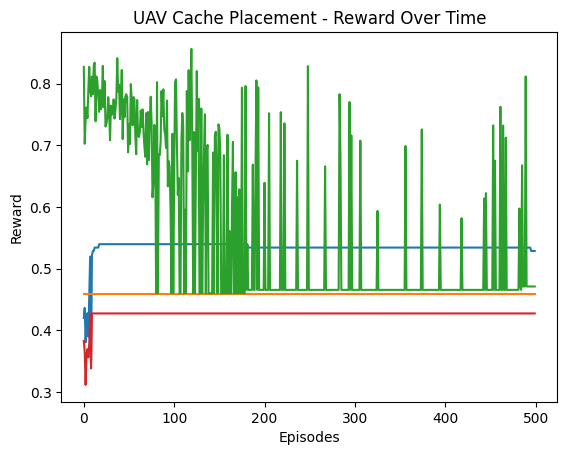

In [ ]:

# Plot Reward Curve
plt.plot(np.array(CHR))
plt.plot(np.array(CHR_Max))
plt.plot(np.array(SystemRegret))
plt.plot(np.array(Cost)*cost_constant)
# plt.plot(np.array(rewards) + np.array(SystemRegret))
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("UAV Cache Placement - Reward Over Time")
plt.show()


In [ ]:
import json
import numpy as np

rewards_list = rewards

# Save to JSON 500_
with open("500iter_3F_16_random_X_rewards_per.json", "w") as f:
    json.dump(rewards_list, f)


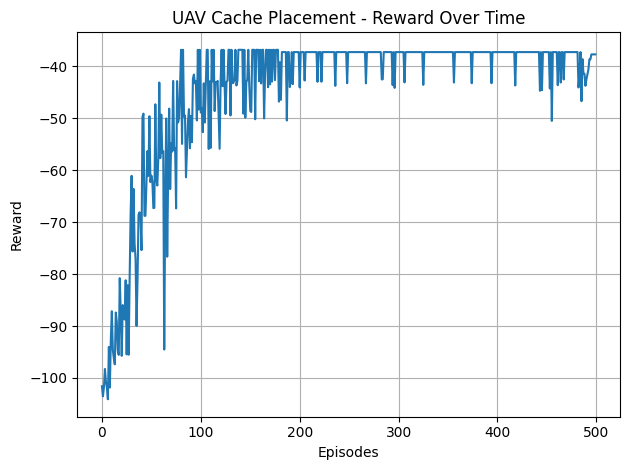

In [ ]:
# Load from JSON
with open("500iter_3F_16_random_X_rewards_per.json", "r") as f:
    loaded_rewards = json.load(f)

# Plot again
import matplotlib.pyplot as plt

plt.plot(np.array(loaded_rewards))
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("UAV Cache Placement - Reward Over Time")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import json
import numpy as np

rewards_list = rewards

# Save to JSON file
with open("500iter_3F_16_Reward_rewards_per.json", "w") as f:
    json.dump(rewards_list, f)
with open("500iter_3F_16_CHR_rewards_per.json", "w") as f:
    json.dump(CHR, f)
with open("500iter_3F_16_CHRMAX_rewards_per.json", "w") as f:
    json.dump(CHR_Max, f)
with open("500iter_3F_16_ystemregret_rewards_per.json", "w") as f:
    json.dump(SystemRegret, f)
with open("500iter_3F_16_OST_rewards_per.json", "w") as f:
    json.dump(Cost, f)


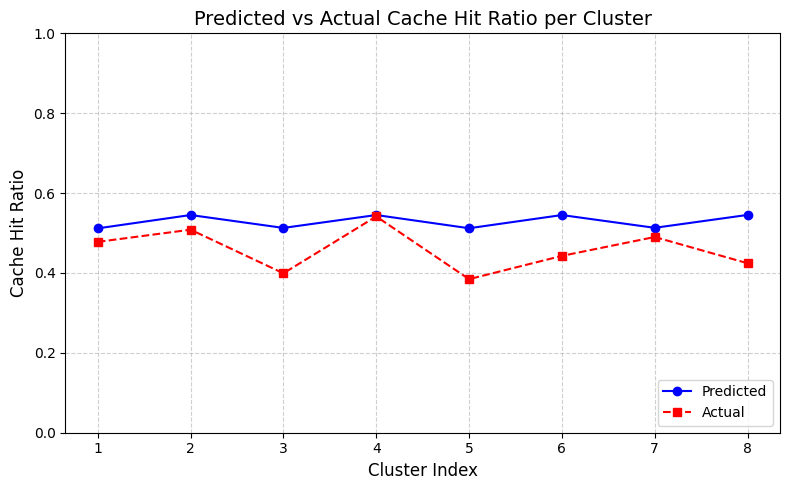

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import json

predicted_hit_ratio = compute_cache_hit_ratio(action, state['predicted_Q_f'], UAVs_per_cluster)

actual_hit_ratio = compute_cache_hit_ratio(state['Xi_t'], actual_Q_f_all_uav, UAVs_per_cluster)

with open("500iter_3F_16_cache_hit_found_per_random_X.json", "w") as f:
    json.dump(predicted_hit_ratio.tolist(), f)

with open("500iter_3F_16_actual_cache_hit_found_per_random_X.json", "w") as f:
    json.dump(actual_hit_ratio.tolist(), f)

# X-axis: cluster index or UAV group
clusters = np.arange(1, len(predicted_hit_ratio) + 1)

# IEEE-style plot settings
plt.figure(figsize=(8, 5))
plt.plot(clusters, predicted_hit_ratio, marker='o', linestyle='-', color='blue', label='Predicted')
plt.plot(clusters, actual_hit_ratio, marker='s', linestyle='--', color='red', label='Actual')

# Styling for IEEE-like appearance
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('Cluster Index', fontsize=12)
plt.ylabel('Cache Hit Ratio', fontsize=12)
plt.title('Predicted vs Actual Cache Hit Ratio per Cluster', fontsize=14)
plt.xticks(clusters)
plt.ylim(0, 1)
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()

# Save or show
plt.savefig("500iter_100F_cache_hit_ratio_comparison_per.pdf", format='pdf')  # for IEEE paper
plt.show()


In [ ]:
count = 0
for j in range(0,len(state['Gamma_t'])):
    temp = 0
    for i in state['Gamma_t'][j]:
        if i&1:
            temp+=1
    print(temp)
print("F' = ", F_prime)

18
18
18
18
18
18
18
18
F' =  18


RANDOM CACHING


In [ ]:
import numpy as np
cache_matrix = np.zeros((U, F), dtype=int)

for u in range(U):
    cached_files = np.random.choice(F, size=F_prime, replace=False)
    cache_matrix[u, cached_files] = 1
print(cache_matrix)

count = 0
for j in range(0,len(cache_matrix)):
    temp = 0
    for i in cache_matrix[j]:
        if i&1:
            temp+=1
    print(temp)
print("F' = ", F_prime)


random_hit_ratio = compute_cache_hit_ratio(cache_matrix, actual_Q_f_all_uav, UAVs_per_cluster)
print(random_hit_ratio)

[[0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0
  0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
  0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0
  1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
  1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0
  1 0 0 0 0 1 0 0 0 0 0 

In [ ]:
print(sum(random_hit_ratio)/U)

0.4798729780413003


In [ ]:

with open("500iter_3F_16_random_cache_hit_found_per_random_X.json", "w") as f:
    json.dump(random_hit_ratio.tolist(), f)
